pip install nltk

In [ ]:
import nltk
nltk.download()

# DATA Preprocessing

In [1]:
input = "Barack Obama went as a prime minister of USA in the year of 2015 . PM MODI is the prime minister of INDIA."
print(input)

Barack Obama went as a prime minister of USA in the year of 2015 . PM MODI is the prime minister of INDIA.


In [2]:
#(1)lowercase
lowercase = input.lower()
print("LOWERCSE = ", lowercase)

#re
#pip install re
import re
lowercase_re = re.sub('2015', '2025', lowercase)
print("REGULAR EXP1 = ", lowercase_re)
lowercase_re = re.sub('[a-m]', '*', lowercase)
print("REGULAR EXP2 = ", lowercase_re)
lowercase_re = re.sub('\d', '-', lowercase)
print("REGULAR EXP3 = ", lowercase_re)

LOWERCSE =  barack obama went as a prime minister of usa in the year of 2015 . pm modi is the prime minister of india.
REGULAR EXP1 =  barack obama went as a prime minister of usa in the year of 2025 . pm modi is the prime minister of india.
REGULAR EXP2 =  **r*** o**** w*nt *s * pr*** **n*st*r o* us* *n t** y**r o* 2015 . p* *o** *s t** pr*** **n*st*r o* *n***.
REGULAR EXP3 =  barack obama went as a prime minister of usa in the year of ---- . pm modi is the prime minister of india.


In [4]:
#(2)Tokenization
import nltk
from nltk import word_tokenize, sent_tokenize

word_tokens = word_tokenize(input)
print("WORD TOKENS = ", word_tokens)
print(len(word_tokens))
sent_tokens = sent_tokenize(input)
print("SENT TOKENS = ", sent_tokens)
print(len(sent_tokens))

WORD TOKENS =  ['Barack', 'Obama', 'went', 'as', 'a', 'prime', 'minister', 'of', 'USA', 'in', 'the', 'year', 'of', '2015', '.', 'PM', 'MODI', 'is', 'the', 'prime', 'minister', 'of', 'INDIA', '.']
24
SENT TOKENS =  ['Barack Obama went as a prime minister of USA in the year of 2015 .', 'PM MODI is the prime minister of INDIA.']
2


In [5]:
#(3)stopwords Removal
from nltk.corpus import stopwords
#print(stopwords.fileids())
stopwords = set(stopwords.words('english'))
#print("\n", stopwords)

tokens_stopwords = []
for token in word_tokens:
    if token not in stopwords:
        tokens_stopwords.append(token)
print(' '.join(tokens_stopwords))

Barack Obama went prime minister USA year 2015 . PM MODI prime minister INDIA .


In [6]:
#Stemmer
stemming = []
from nltk import PorterStemmer
for word in tokens_stopwords:
    stemming.append(PorterStemmer().stem(word))
print(stemming)

['barack', 'obama', 'went', 'prime', 'minist', 'usa', 'year', '2015', '.', 'pm', 'modi', 'prime', 'minist', 'india', '.']


In [8]:
#Lemmatizer
from nltk import WordNetLemmatizer
lma = []
for word in tokens_stopwords:
    lma.append(WordNetLemmatizer().lemmatize(word))
print(lma)

['Barack', 'Obama', 'went', 'prime', 'minister', 'USA', 'year', '2015', '.', 'PM', 'MODI', 'prime', 'minister', 'INDIA', '.']


In [9]:
#POS Tags
from nltk import pos_tag
print(pos_tag(word_tokens))

[('Barack', 'NNP'), ('Obama', 'NNP'), ('went', 'VBD'), ('as', 'IN'), ('a', 'DT'), ('prime', 'JJ'), ('minister', 'NN'), ('of', 'IN'), ('USA', 'NNP'), ('in', 'IN'), ('the', 'DT'), ('year', 'NN'), ('of', 'IN'), ('2015', 'CD'), ('.', '.'), ('PM', 'NNP'), ('MODI', 'NNP'), ('is', 'VBZ'), ('the', 'DT'), ('prime', 'JJ'), ('minister', 'NN'), ('of', 'IN'), ('INDIA', 'NNP'), ('.', '.')]


In [10]:
from nltk.corpus import brown
brown.words()

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [11]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [15]:
text1

<Text: Moby Dick by Herman Melville 1851>

In [16]:
text2

<Text: Sense and Sensibility by Jane Austen 1811>

In [17]:
text1.concordance("monstrous")

Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u


In [18]:
text1.similar("monstrous")

true contemptible christian abundant few part mean careful puzzled
mystifying passing curious loving wise doleful gamesome singular
delightfully perilous fearless


In [19]:
text2.similar("monstrous")

very so exceedingly heartily a as good great extremely remarkably
sweet vast amazingly


In [20]:
!pip install spacy

# NAMED ENTITY RECOGNITION

In [21]:
import nltk
from nltk import word_tokenize, pos_tag, ne_chunk, sent_tokenize

input = "Barack Obama went as a prime minister of USA in the year of 2015 . PM MODI is the prime minister of INDIA."
ner = ne_chunk(pos_tag(word_tokenize(input)))
# print(ner)

from nltk.tree import Tree
named_entity = []
for subtree in ner:
    if isinstance(subtree, Tree):
        entity = "".join([token for token, pos in subtree.leaves()])
        named_entity.append(entity)
print(named_entity)

['Barack', 'Obama', 'USA', 'INDIA']


In [25]:
!python -m spacy download en_core_web_sm


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
     - ------------------------------------- 0.5/12.8 MB 409.6 kB/s eta 0:00:30
     -- ------------------------------------ 0.8/12.8 MB 599.2 kB/s eta 0:00:21
     -- ------------------------------------ 0.8/12.8 MB 599.2 kB/s eta 0:00:21
     --- ----------------------------------- 1.0/12.8 MB 547.3 kB/s eta 0:00:22
     --- ----------------------------------- 1.0/12.8 MB 547.3 kB/s eta 0:00:22
     --- ----------------------------------- 1.3/12.8 MB 588.8 kB/s eta 0:00:20
     --- ----------------------------------- 1.3/12.8 MB 588.8 kB/s eta 0:00:20
     ---- ---------------------------------- 1.6/12.8 MB 586.7 kB/s eta 0:00:20


In [26]:
#pip install spacy
import spacy
nlp = spacy.load("en_core_web_sm")

text = "Barack Obama went as a prime minister of USA in the year of 2015 . PM MODI is the prime minister of INDIA."
doc = nlp(text)
named_entity = []
for ent in doc.ents:
    named_entity.append(ent.text)
print(named_entity)

['Barack Obama', 'USA', 'the year of 2015', 'PM MODI', 'INDIA']


# Predictive Analysis

In [27]:
# TF-IDF
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
#pip install scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

stopwords = set(stopwords.words('english'))
ps = PorterStemmer()
vector = TfidfVectorizer()

documents= [ "apple boy cat", "apple cat dog", "dog egg fan" ]

preprocessed = []
for doc in documents:
    tokenization = word_tokenize(doc)
    stop = [ps.stem(word) for word in tokenization if word not in stopwords]
    preprocessed.append(" ".join(stop))
print(preprocessed)
word_score = vector.fit_transform(preprocessed)
print(word_score)

['appl boy cat', 'appl cat dog', 'dog egg fan']
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 9 stored elements and shape (3, 6)>
  Coords	Values
  (0, 0)	0.5178561161676974
  (0, 1)	0.680918560398684
  (0, 2)	0.5178561161676974
  (1, 0)	0.5773502691896257
  (1, 2)	0.5773502691896257
  (1, 3)	0.5773502691896257
  (2, 3)	0.4736296010332684
  (2, 4)	0.6227660078332259
  (2, 5)	0.6227660078332259


# SIMPLE LINEAR REGRESSION

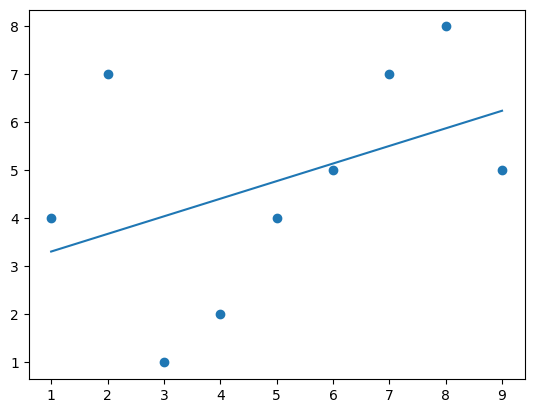

In [28]:
import matplotlib.pyplot as plt

x = [1,2,3,4,5,6,7,8,9]
y = [4,7,1,2,4,5,7,8,5]

def slr(x):
    return slope * x + intercept

from scipy import stats
slope, intercept, r, p, std_err = stats.linregress(x,y)

model = list(map(slr, x))
plt.plot(x, model)

plt.scatter(x,y)
plt.show()

# MULTIPLE LINEAR REGRESSION

In [29]:
import pandas as pd
iris = pd.read_csv("IRIS.csv")
print(iris)
import numpy as np

x = iris[['SepalLengthCm', 'SepalWidthCm']]
y = iris.PetalLengthCm

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

from sklearn.linear_model import LinearRegression
LR = LinearRegression()
training = LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)
print(y_pred)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

# SLR $ MLR with Performance Metrics

In [2]:
import pandas as pd
iris = pd.read_csv("IRIS.csv")
print(iris)

import numpy as np

x = iris[['SepalLengthCm', 'SepalWidthCm']]
y = iris.PetalLengthCm

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

from sklearn.linear_model import LinearRegression
LR = LinearRegression()

training = LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)
print(y_pred, "\n")

#pip install numpy
import numpy as np
from sklearn import metrics

MAE = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absoute Error: ", MAE)
MSE = metrics.mean_squared_error(y_test, y_pred)
print("Mean Squeared Error: ", MSE)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", RMSE)


import numpy as np

x = iris[['SepalLengthCm']]
y = iris.PetalLengthCm

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

from sklearn.linear_model import LinearRegression
LR = LinearRegression()

training = LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)
print(y_pred, "\n")

#pip install numpy
import numpy as np
from sklearn import metrics

MAE = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absoute Error: ", MAE)
MSE = metrics.mean_squared_error(y_test, y_pred)
print("Mean Squeared Error: ", MSE)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", RMSE)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

# CLASSIFICATION

In [1]:
from sklearn import datasets

iris = datasets.load_iris()
x = iris.data
y = iris.target

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test  = train_test_split(x,y,train_size=0.8)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

train = knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(y_pred)

[2 0 2 0 1 1 0 1 0 2 2 2 0 1 2 0 1 2 1 1 0 0 0 2 0 1 1 1 2 1]


# KNN

In [3]:
from sklearn import datasets
iris = datasets.load_iris()

x = iris.data
y = iris.target

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

train = knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(y_pred)
y_auc = knn.predict_proba(x_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
Accuracy = accuracy_score(y_test, y_pred)
Precision = precision_score(y_test, y_pred, average='macro')
Recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
auc = roc_auc_score(y_test, y_auc, multi_class='ovr')

print("\nAccuracy : ", Accuracy)
print("Precision : ", Precision)
print("Recall : ", Recall)
print("F1-SCORE : ", f1)
print("AUC : ", auc)

[1 0 1 0 2 0 0 2 2 2 0 0 1 0 2 0 2 0 1 2 0 2 2 1 1 0 1 0 2 2]

Accuracy :  0.9333333333333333
Precision :  0.9393939393939394
Recall :  0.9259259259259259
F1-SCORE :  0.9249999999999999
AUC :  0.9947089947089948


# Decision Tree

In [1]:
from sklearn import datasets
iris = datasets.load_iris()

x = iris.data
y = iris.target

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8)

from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()

train = DT.fit(x_train, y_train)
y_pred = DT.predict(x_test)
print(y_pred)
y_auc = DT.predict_proba(x_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
Accuracy = accuracy_score(y_test, y_pred)
Precision = precision_score(y_test, y_pred, average='macro')
Recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
auc = roc_auc_score(y_test, y_auc, multi_class='ovr')

print("\nAccuracy : ", Accuracy)
print("Precision : ", Precision)
print("Recall : ", Recall)
print("F1-SCORE : ", f1)
print("AUC : ", auc)

[0 0 2 2 0 0 0 2 2 0 0 2 2 0 2 2 0 1 0 0 1 1 1 1 1 2 1 2 1 2]

Accuracy :  0.9333333333333333
Precision :  0.9280303030303031
Recall :  0.9280303030303031
F1-SCORE :  0.9280303030303031
AUC :  0.9476674641148325


# RANDOM FOREST

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

x = iris.data
y = iris.target

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8)

from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()

train = RF.fit(x_train, y_train)
y_pred = RF.predict(x_test)
print(y_pred)
y_auc = RF.predict_proba(x_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
Accuracy = accuracy_score(y_test, y_pred)
Precision = precision_score(y_test, y_pred, average='macro')
Recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
auc = roc_auc_score(y_test, y_auc, multi_class='ovr')

print("\nAccuracy : ", Accuracy)
print("Precision : ", Precision)
print("Recall : ", Recall)
print("F1-SCORE : ", f1)
print("AUC : ", auc)

[1 0 2 1 1 2 1 1 0 2 2 2 0 2 1 1 0 1 2 1 2 0 0 2 2 0 2 0 1 2]

Accuracy :  1.0
Precision :  1.0
Recall :  1.0
F1-SCORE :  1.0
AUC :  1.0
